In [1]:
import sys
sys.path.append('..')
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from nt_toolbox.signal import gaussian_blur, imageplot, load_image
from nt_toolbox.perform_blurring import perform_blurring
from nt_toolbox.general import rescale
from plotting_tools import cplot
from numeric_tools import compute_gradient, planar_curve
from active_contours import perform_gradient_descent_standard_curve, perform_gradient_descent_polar_curve
from skimage import transform
from nt_toolbox.perform_redistancing import *
import scipy

In [2]:
n = 200


In [3]:
def create_square(i, j, l):
    W = np.zeros((n,n))
    W[int(i-l/2):int(i+l/2),int(j-l/2):int(j+l/2)] = 1
    return W

In [4]:
def moving_square(start_i, start_j, end_i, end_j, l, nb_frames, apply_gaussian, sigma):
    i_s = np.linspace(start_i, end_i, nb_frames).astype('int')
    j_s = np.linspace(start_j, end_j, nb_frames).astype('int')
    Ws = []
    for t in range(nb_frames):
        W = create_square(i_s[t], j_s[t], l)
        if apply_gaussian:
            noise = np.random.normal(0, sigma, n*n).reshape(n,n )
            W = W + noise
        Ws.append(W)
    return  Ws

In [5]:
Ws = moving_square(180, 20, 20, 180, 30, 20, True, 0.2)

In [6]:
nb_points_c = 128
c_0 = 180 + 1j*20
c_r = [20]*nb_points_c

theta = np.transpose(np.linspace(0, 2 * np.pi, nb_points_c + 1))
theta = theta[0:-1]
c = planar_curve(c_0, c_r, theta)

plt.figure()
imageplot(np.transpose(Ws[0]))
cplot(c)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


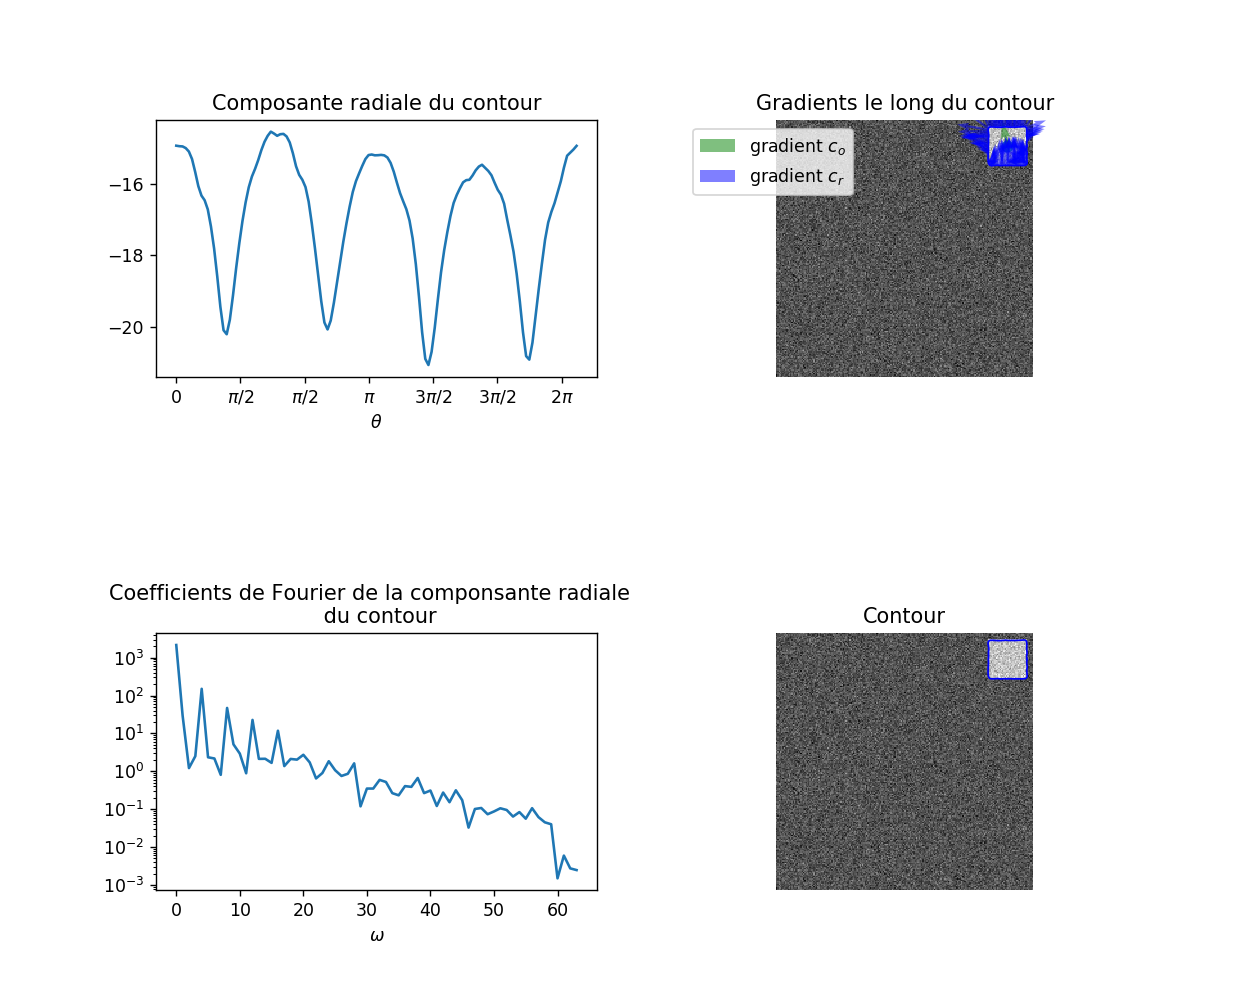

In [8]:
c_0, c_r = perform_gradient_descent_polar_curve(Ws[0],
                                                c_0,
                                                 c_r,
                                                 dt=1,
                                                 niter=500,
                                                 nb_points_c=128,
                                                 sobolev=True,
                                                 lam=1,
                                                 gamma=0.042,
                                                 region_term=Ws[0],
                                                 c1=1,
                                                 c2=0,
                                                 step_display=50,
                                                 save='results/tracking',
                                                 save_contour='results/tracking_contour'
                                                 )


<IPython.core.display.Javascript object>


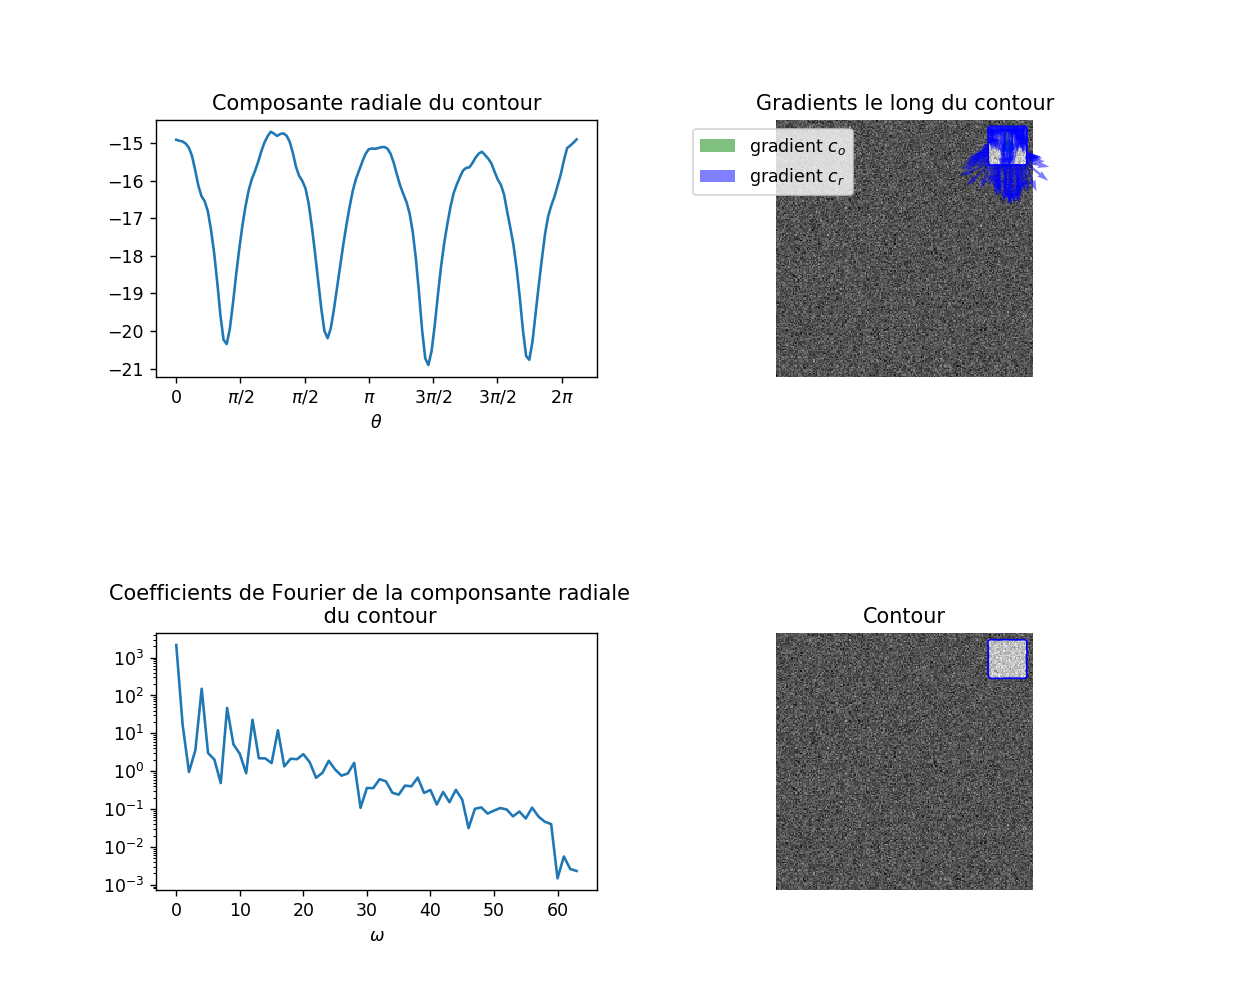

<IPython.core.display.Javascript object>


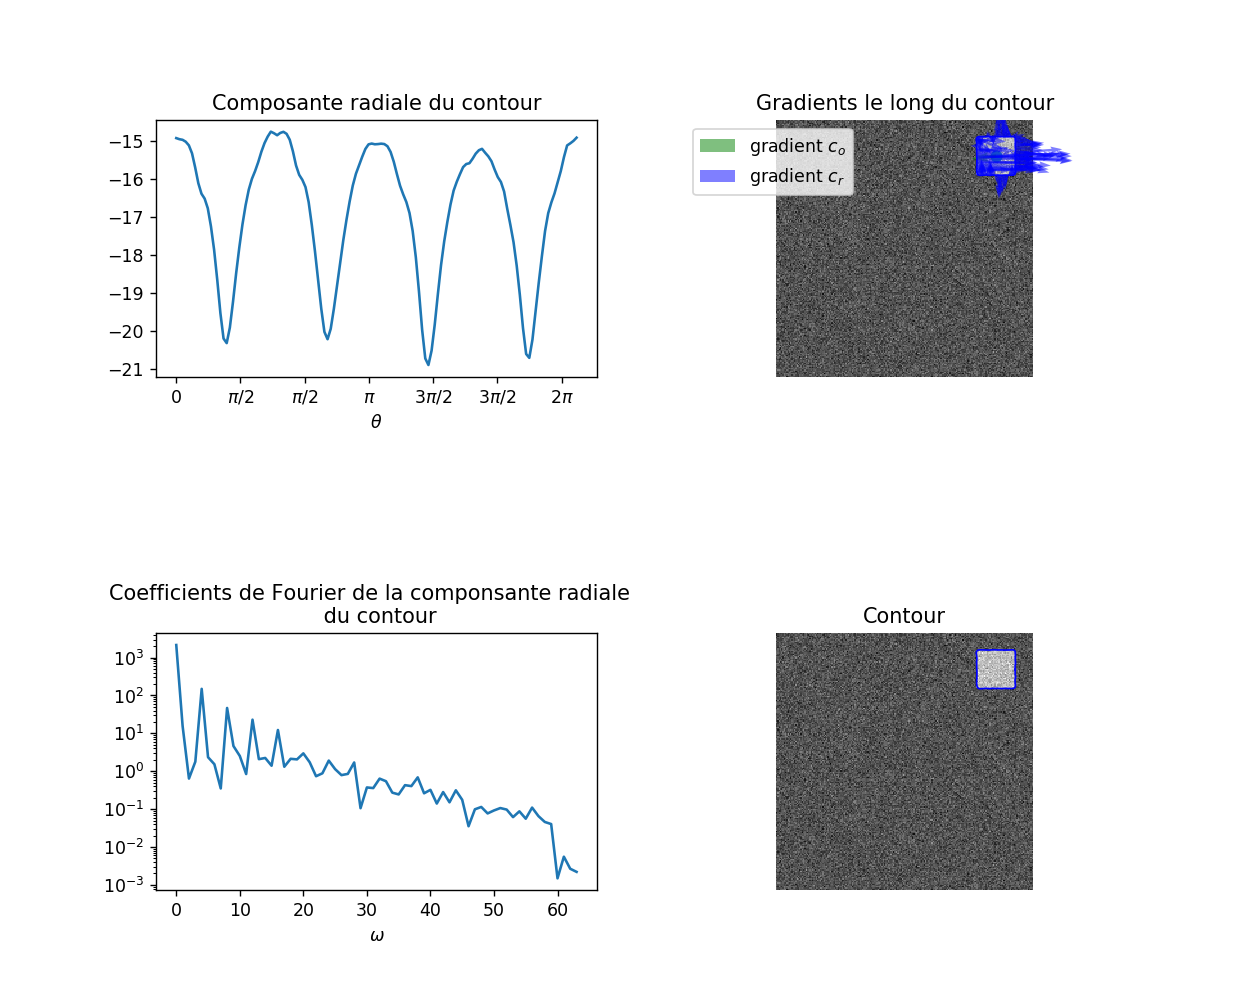

<IPython.core.display.Javascript object>


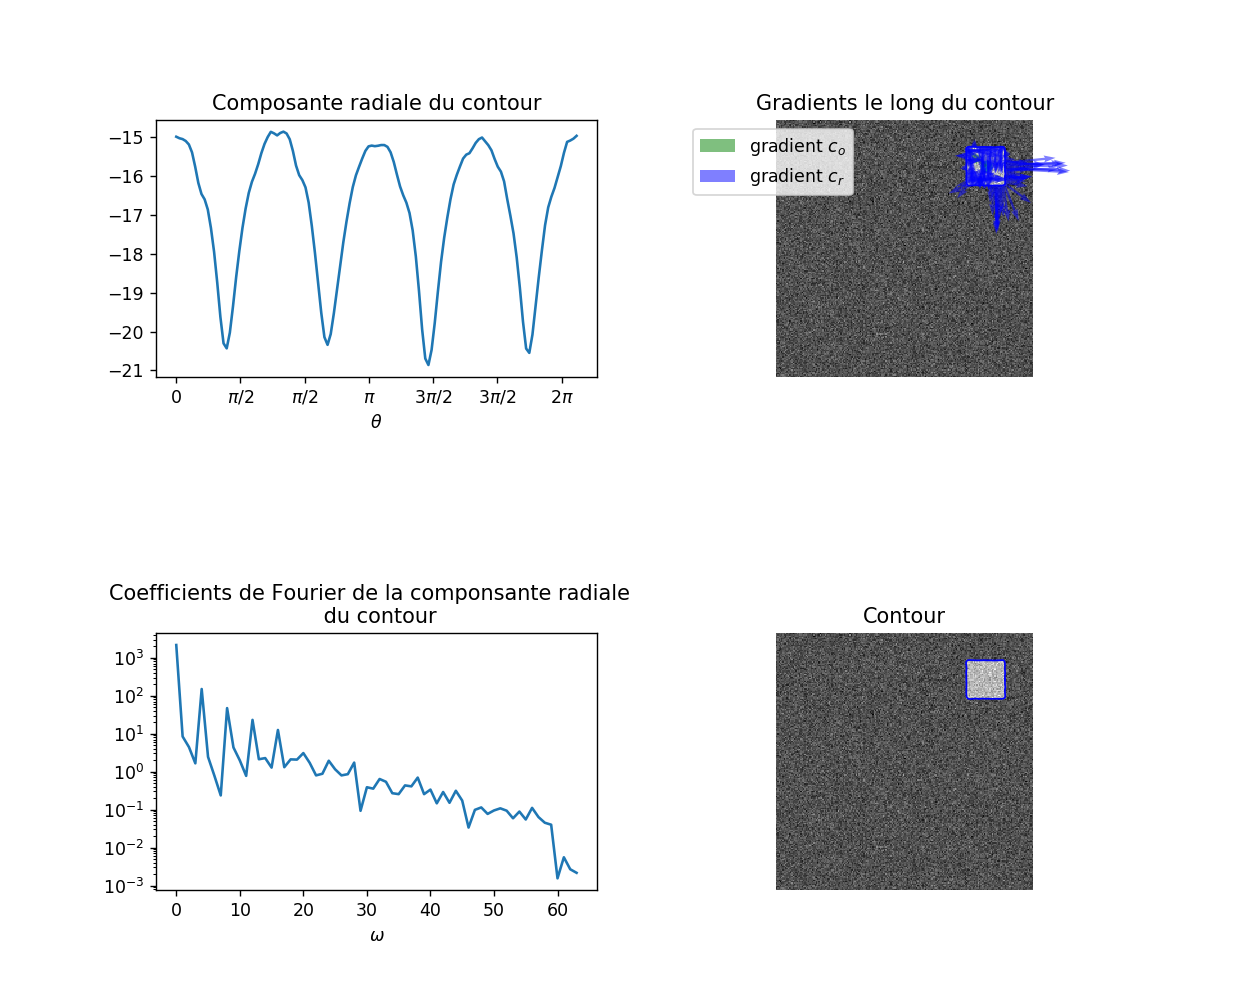

<IPython.core.display.Javascript object>


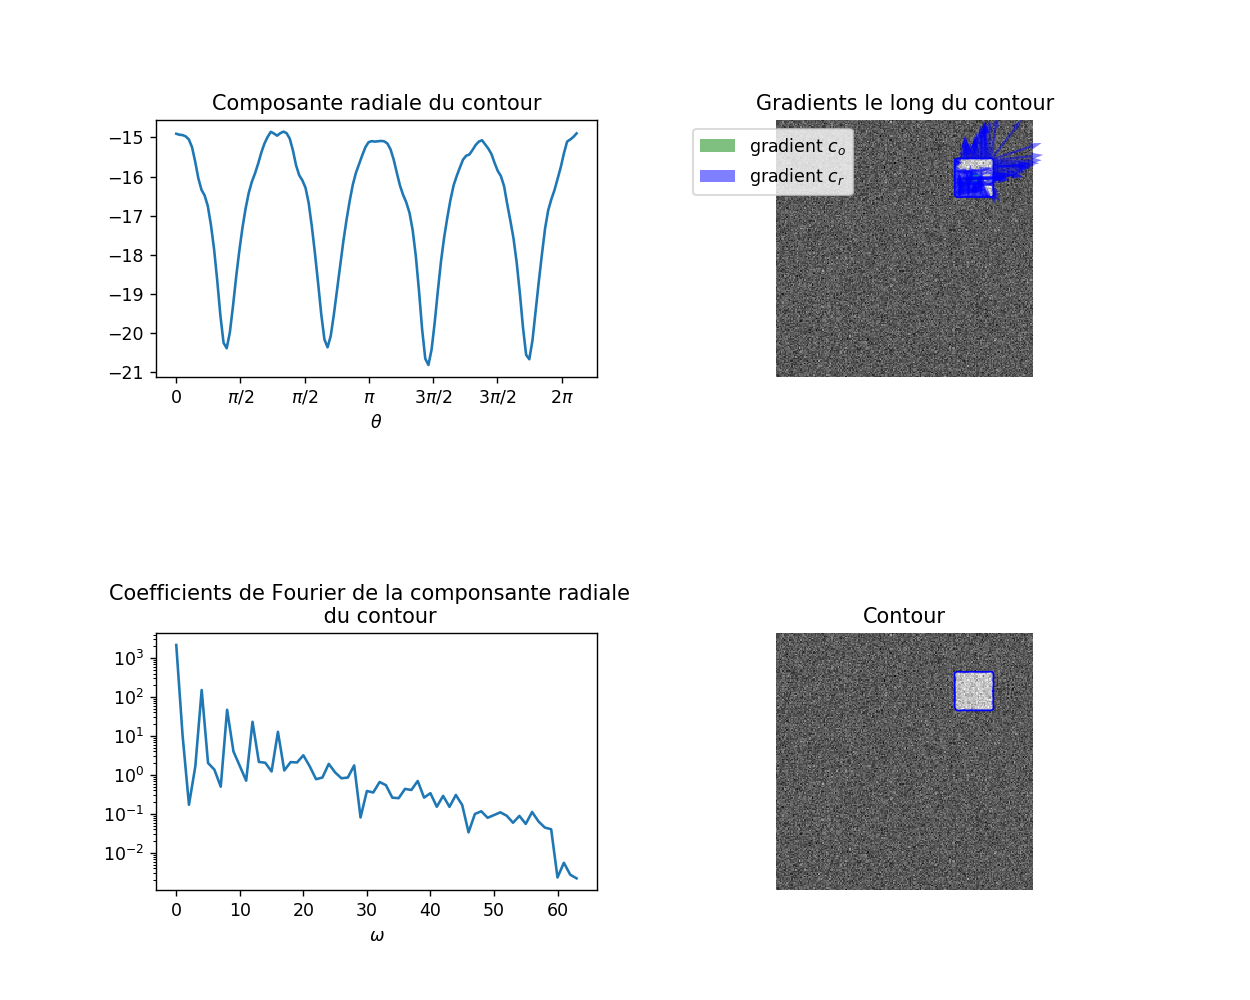

<IPython.core.display.Javascript object>


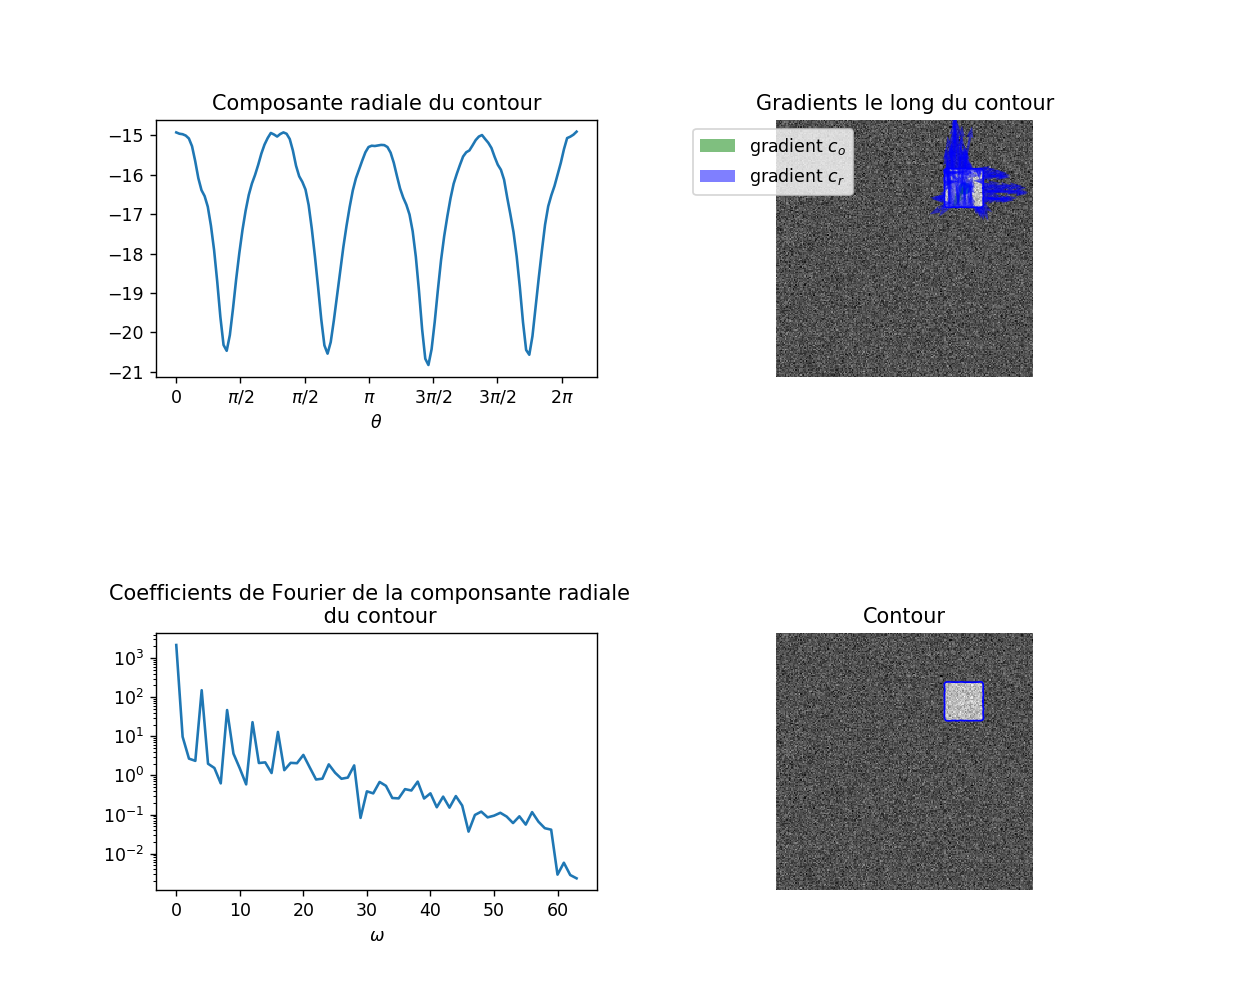

<IPython.core.display.Javascript object>


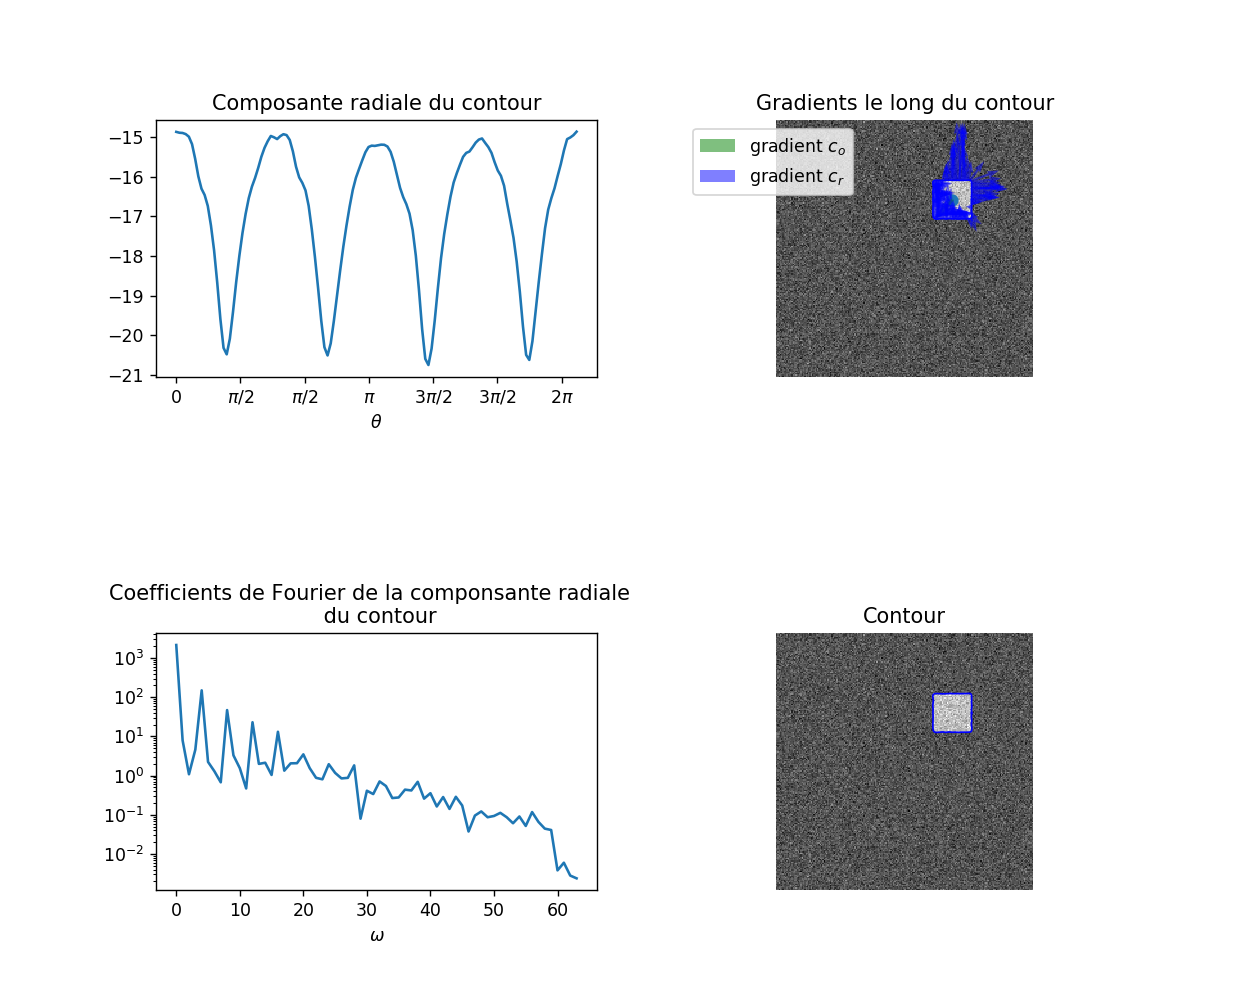

<IPython.core.display.Javascript object>


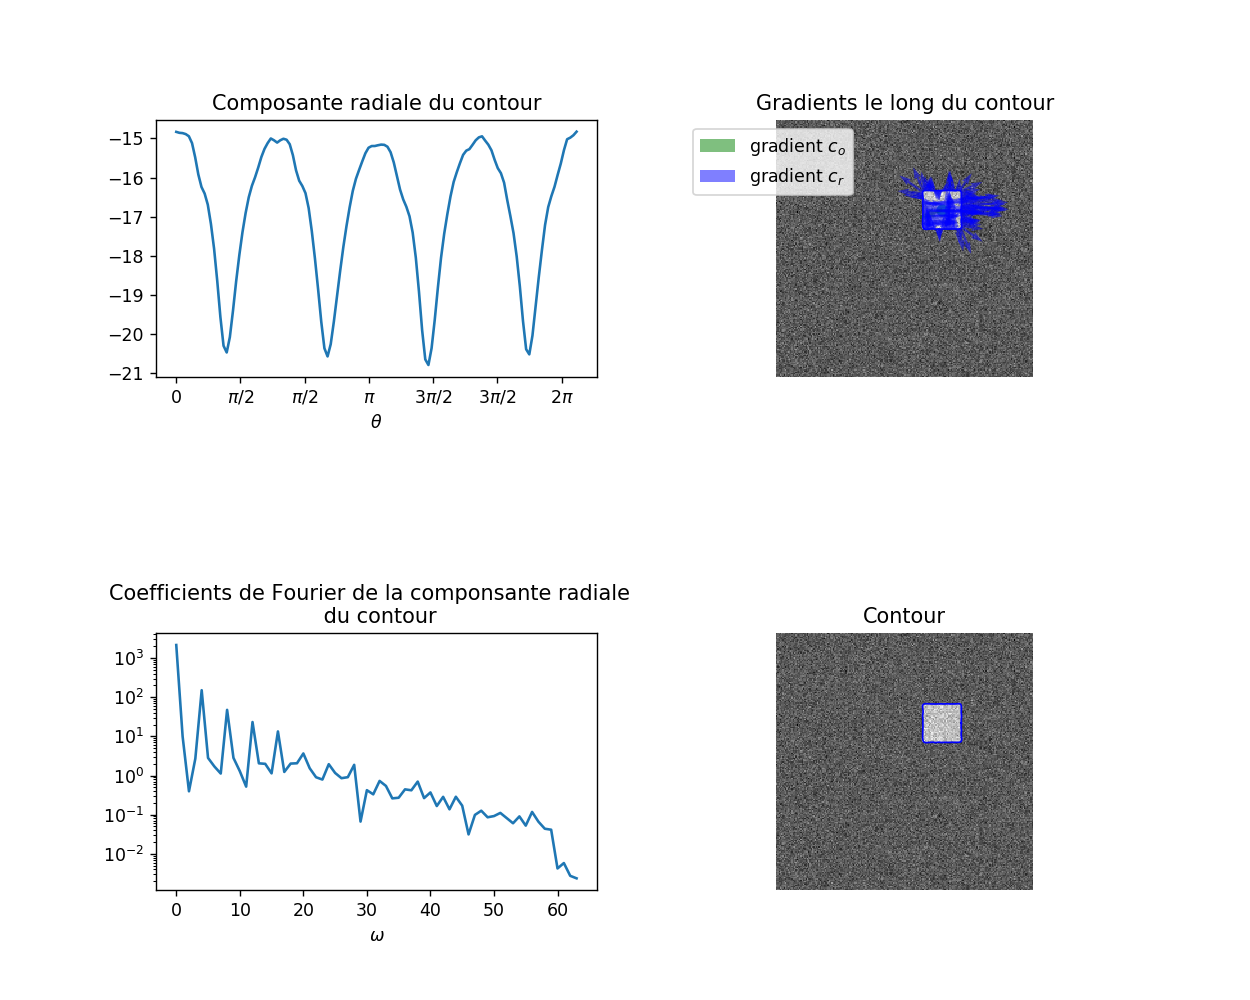

<IPython.core.display.Javascript object>


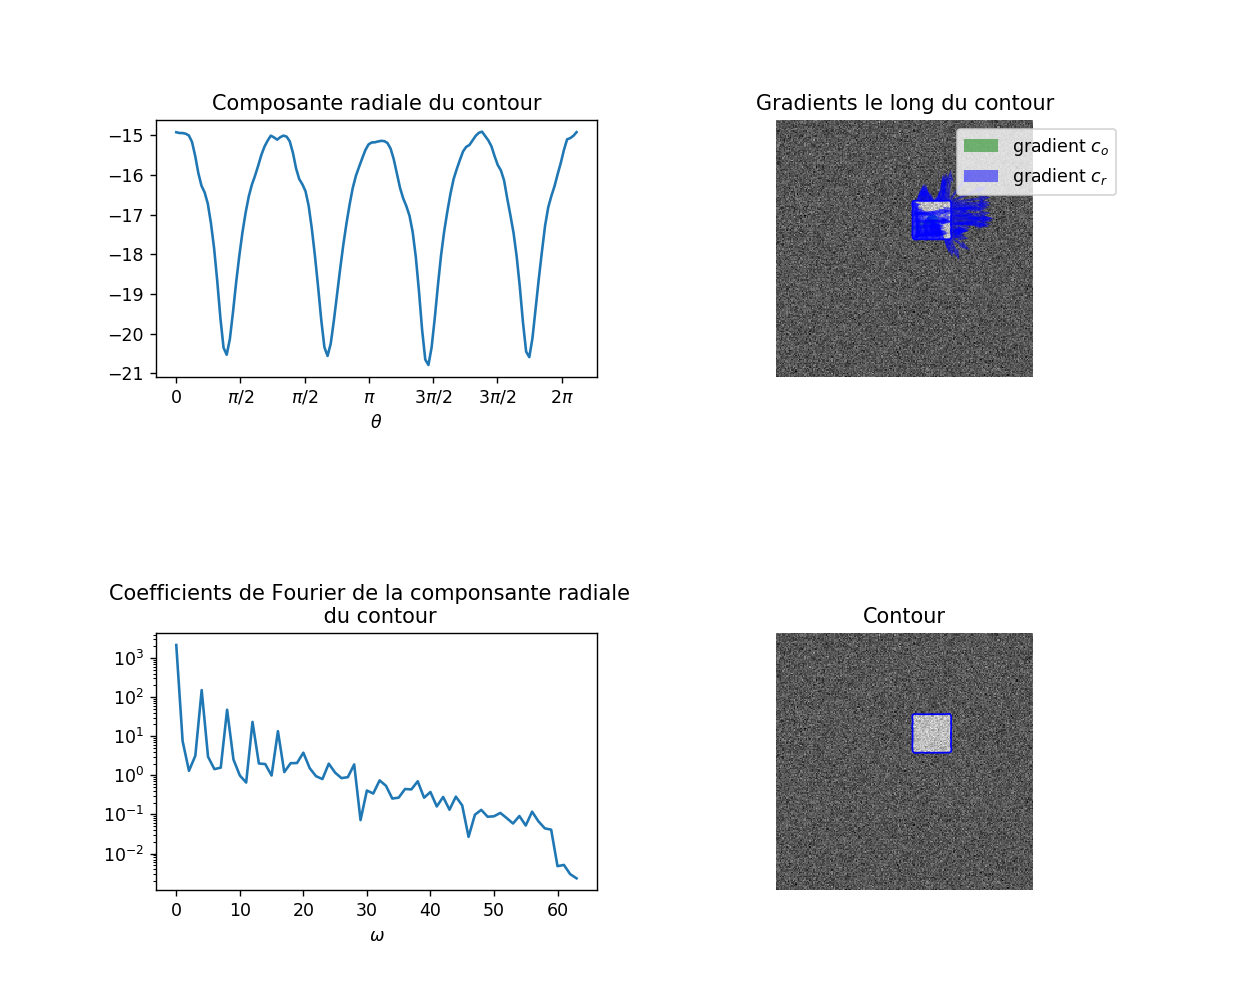

<IPython.core.display.Javascript object>


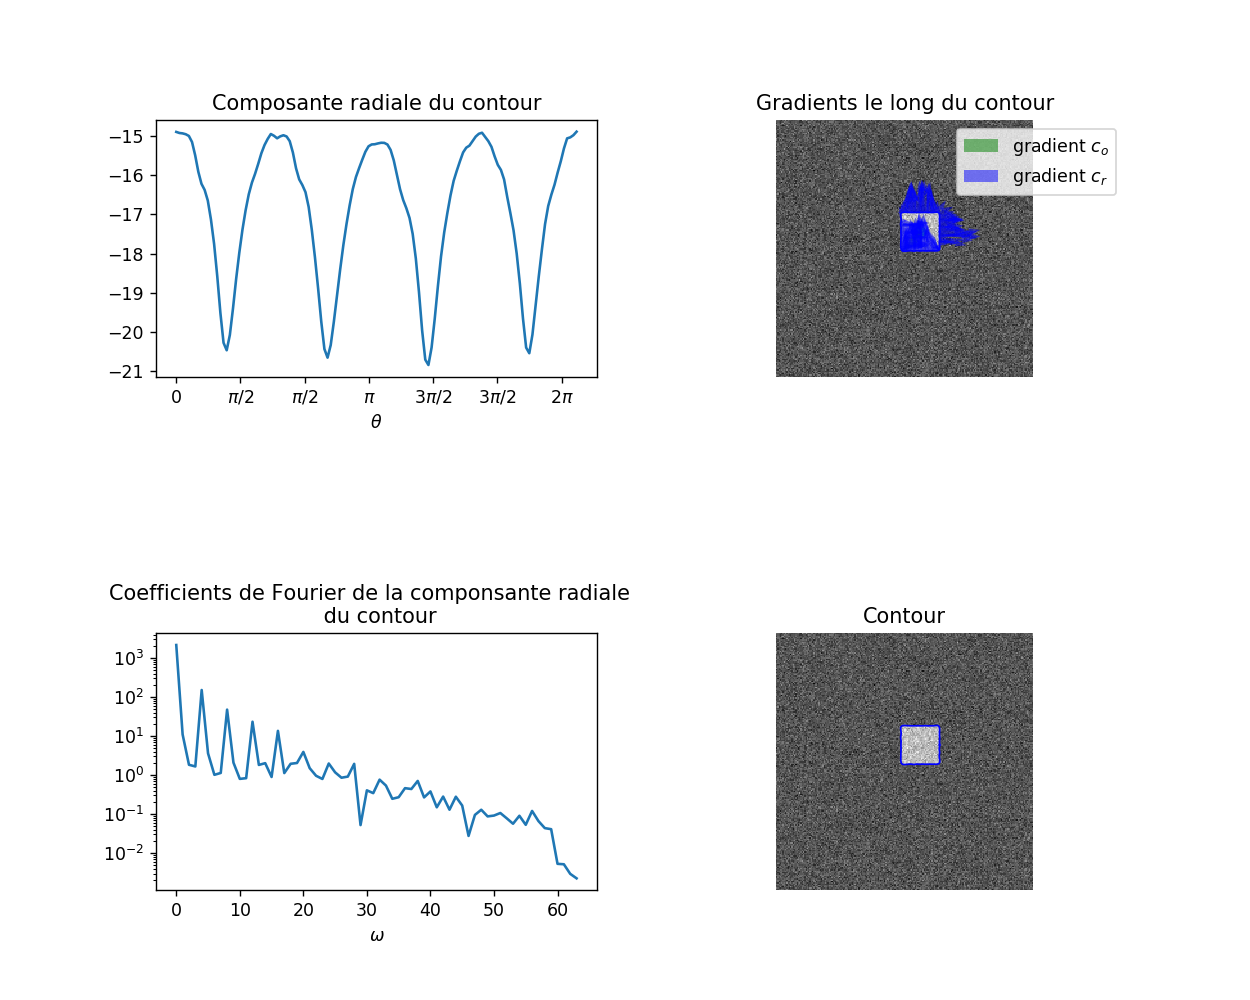

<IPython.core.display.Javascript object>


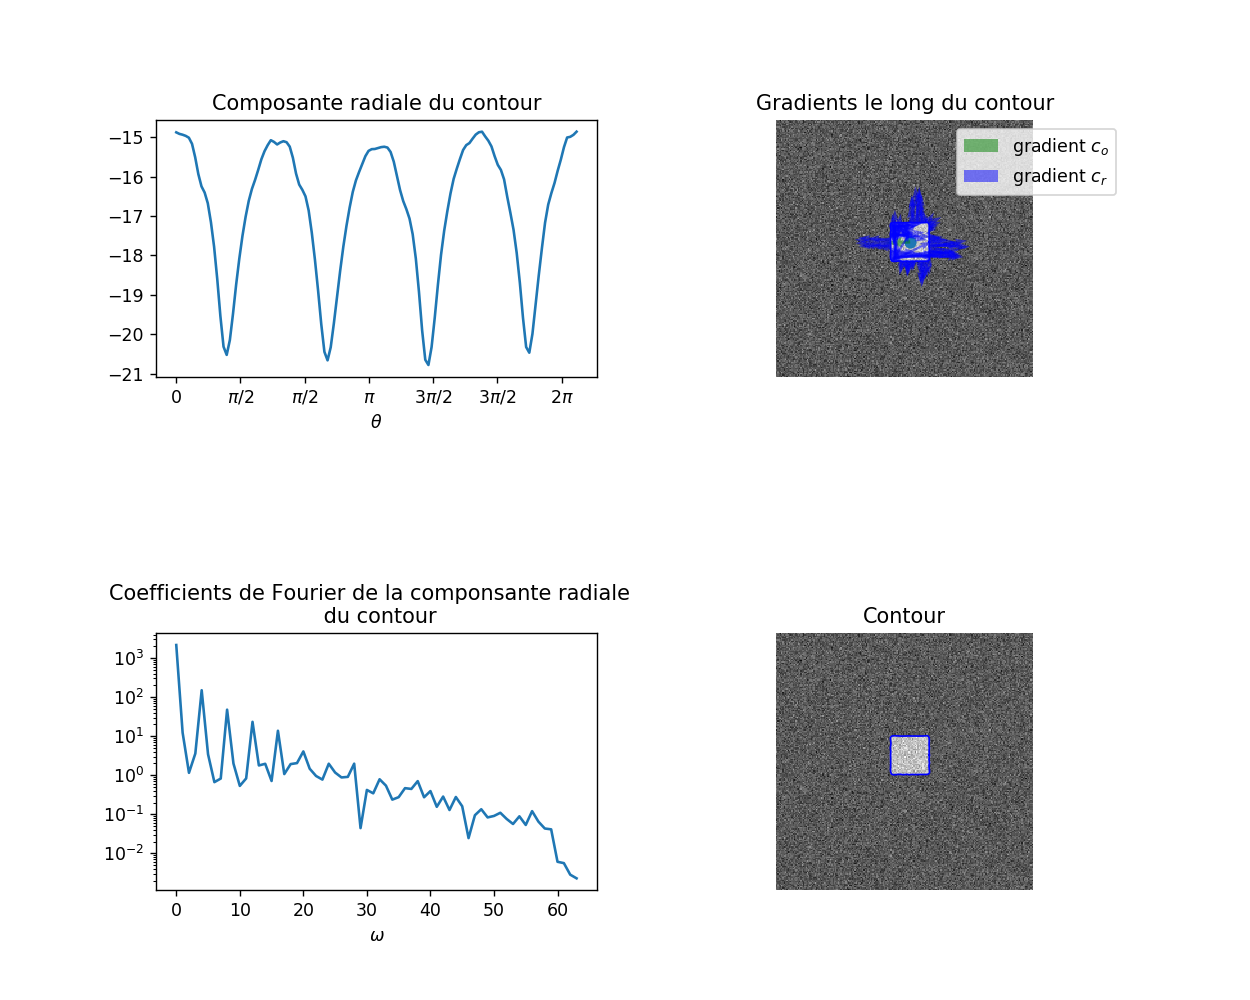

<IPython.core.display.Javascript object>


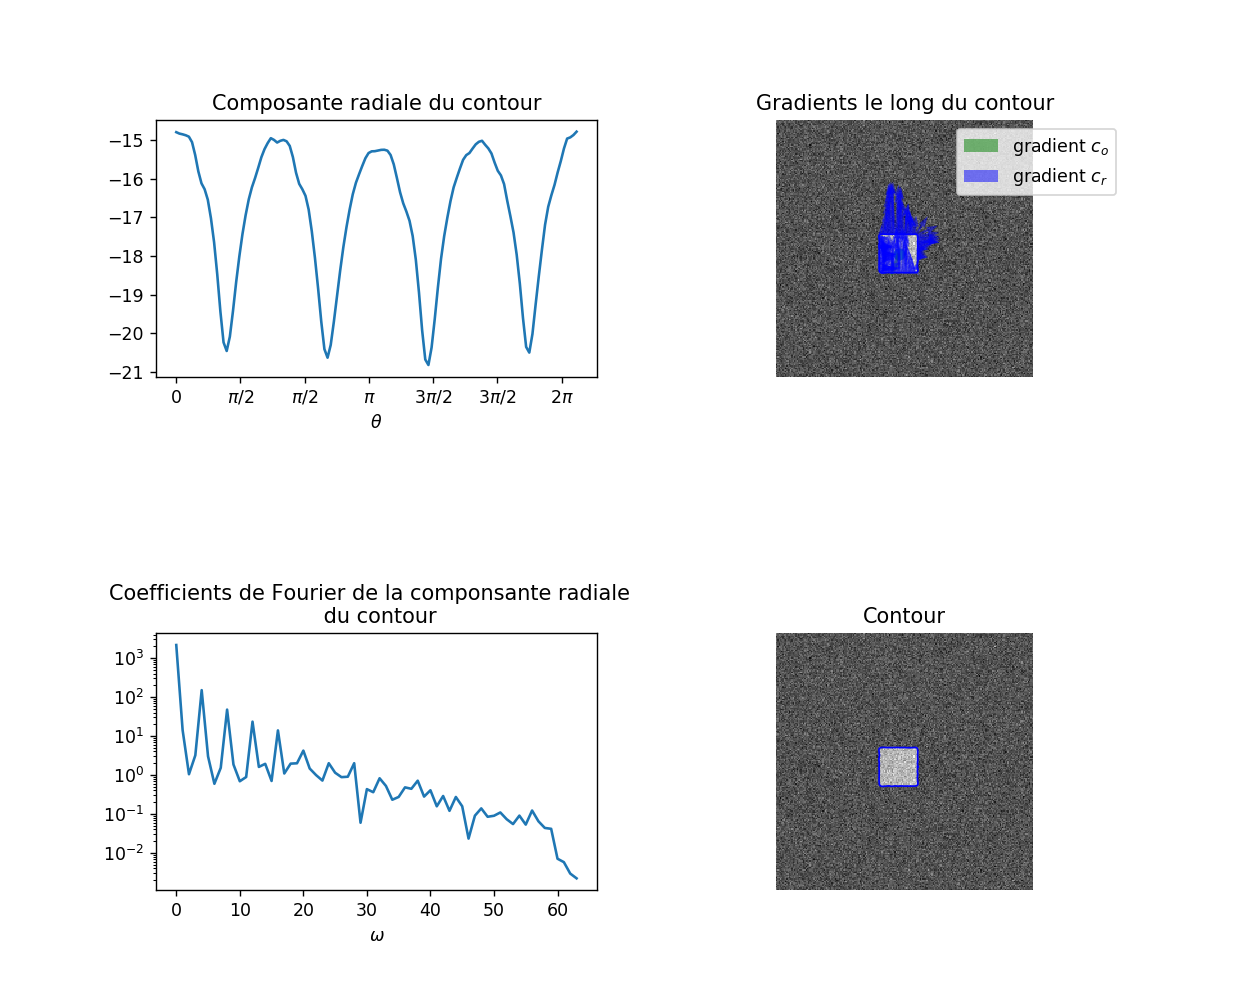

<IPython.core.display.Javascript object>


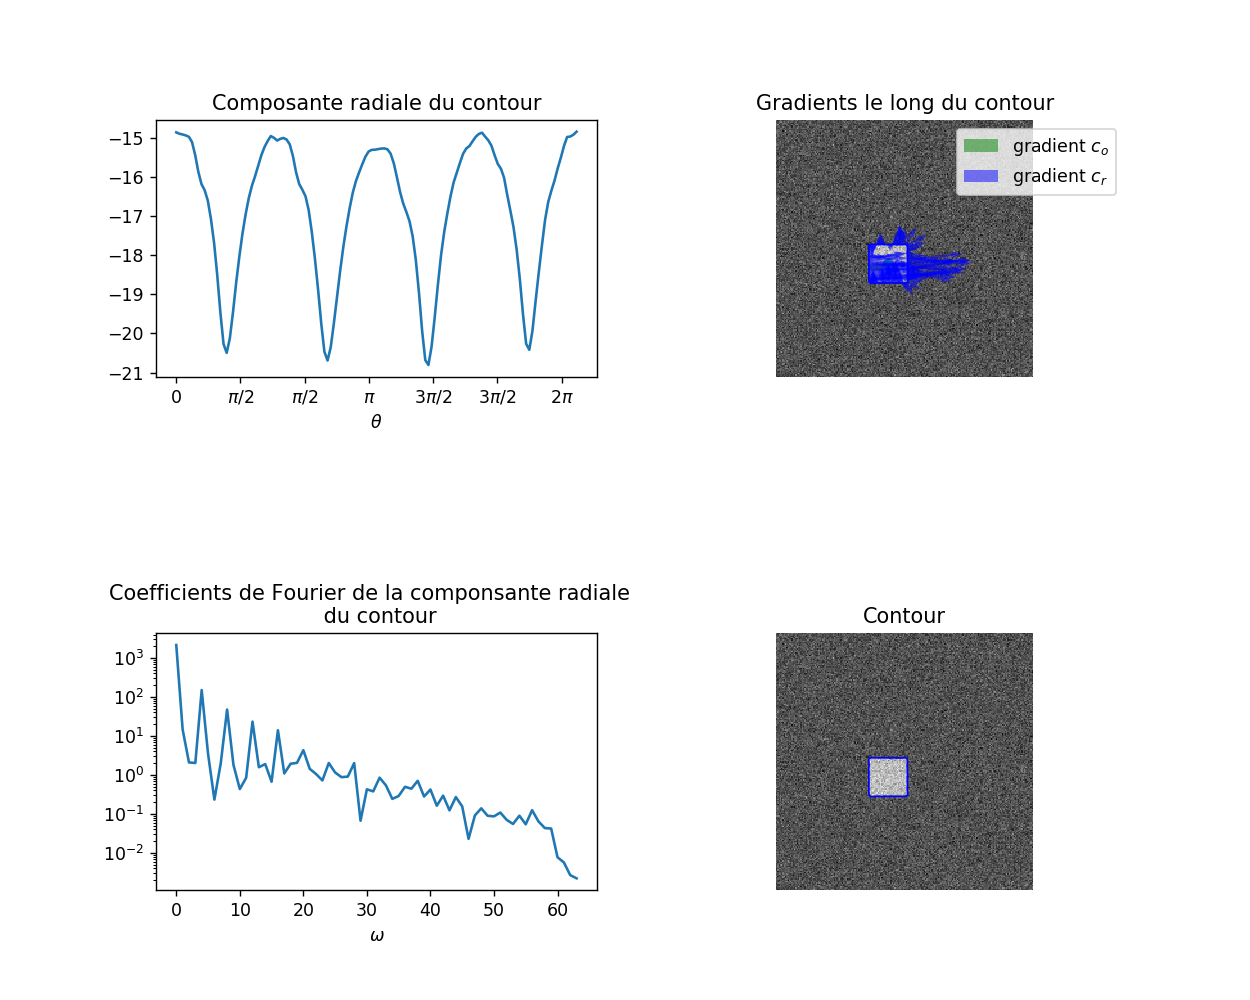

<IPython.core.display.Javascript object>


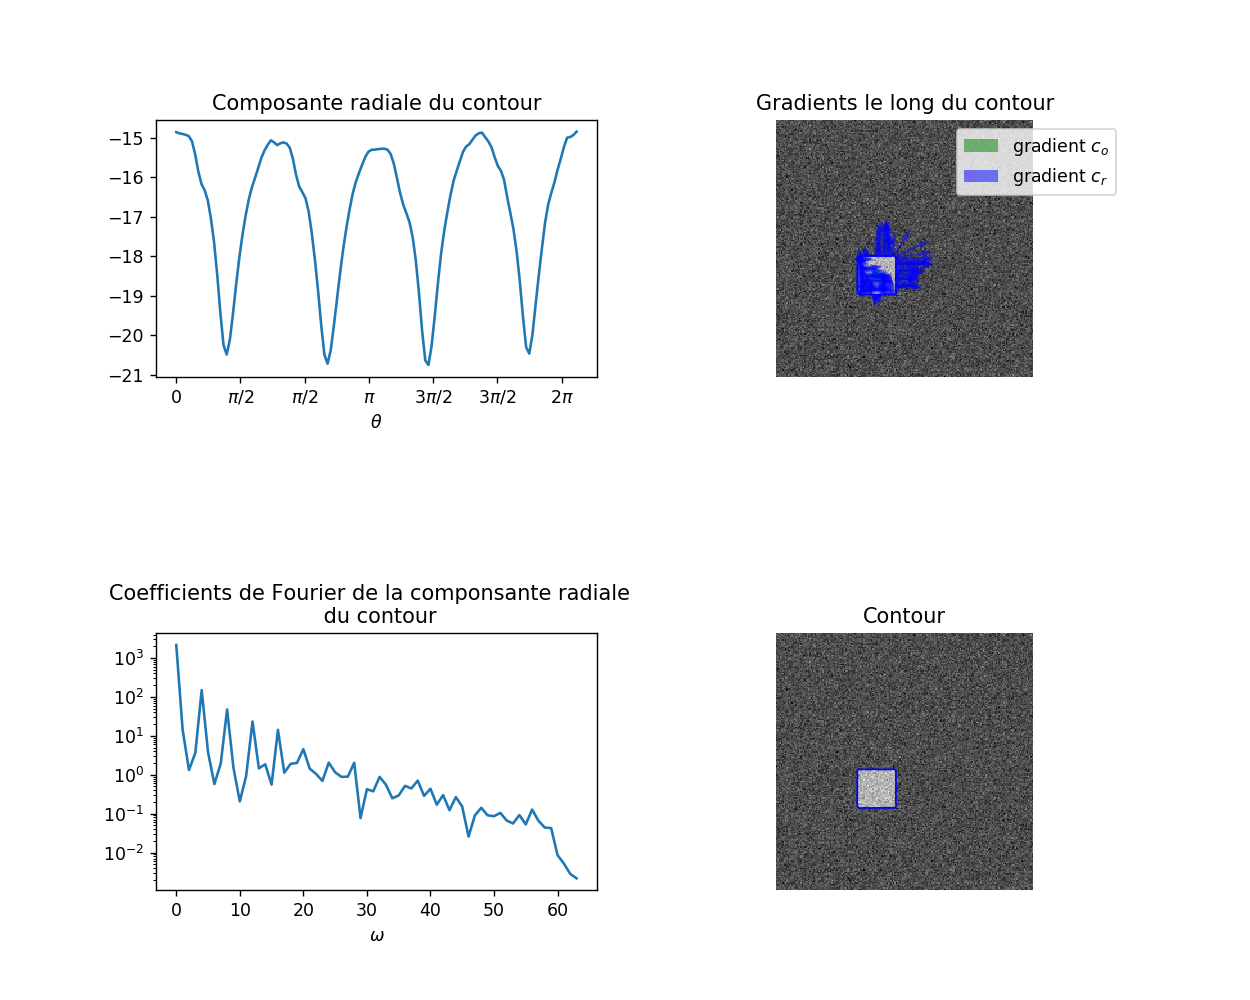

<IPython.core.display.Javascript object>


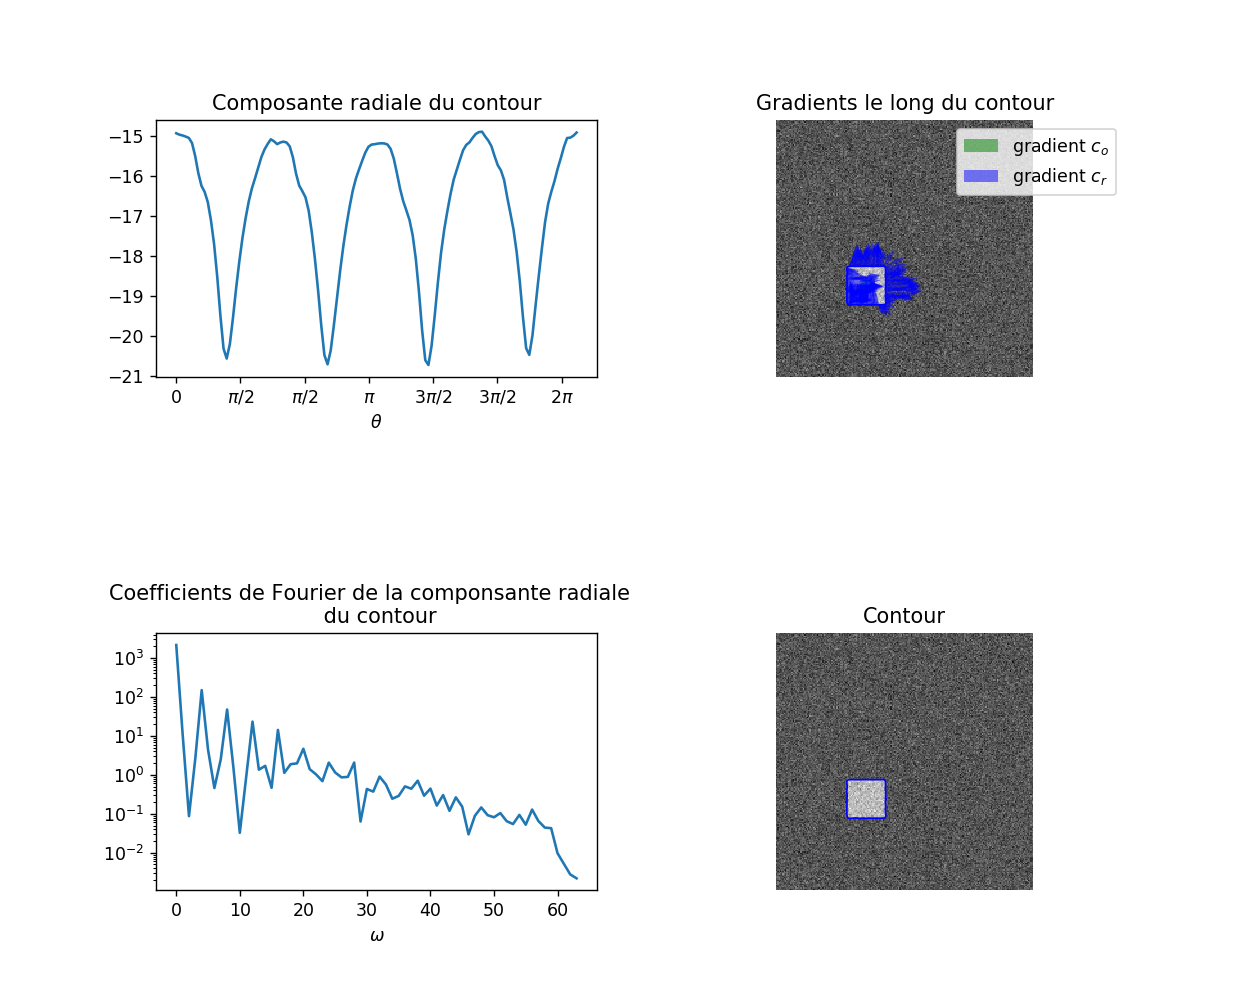

<IPython.core.display.Javascript object>


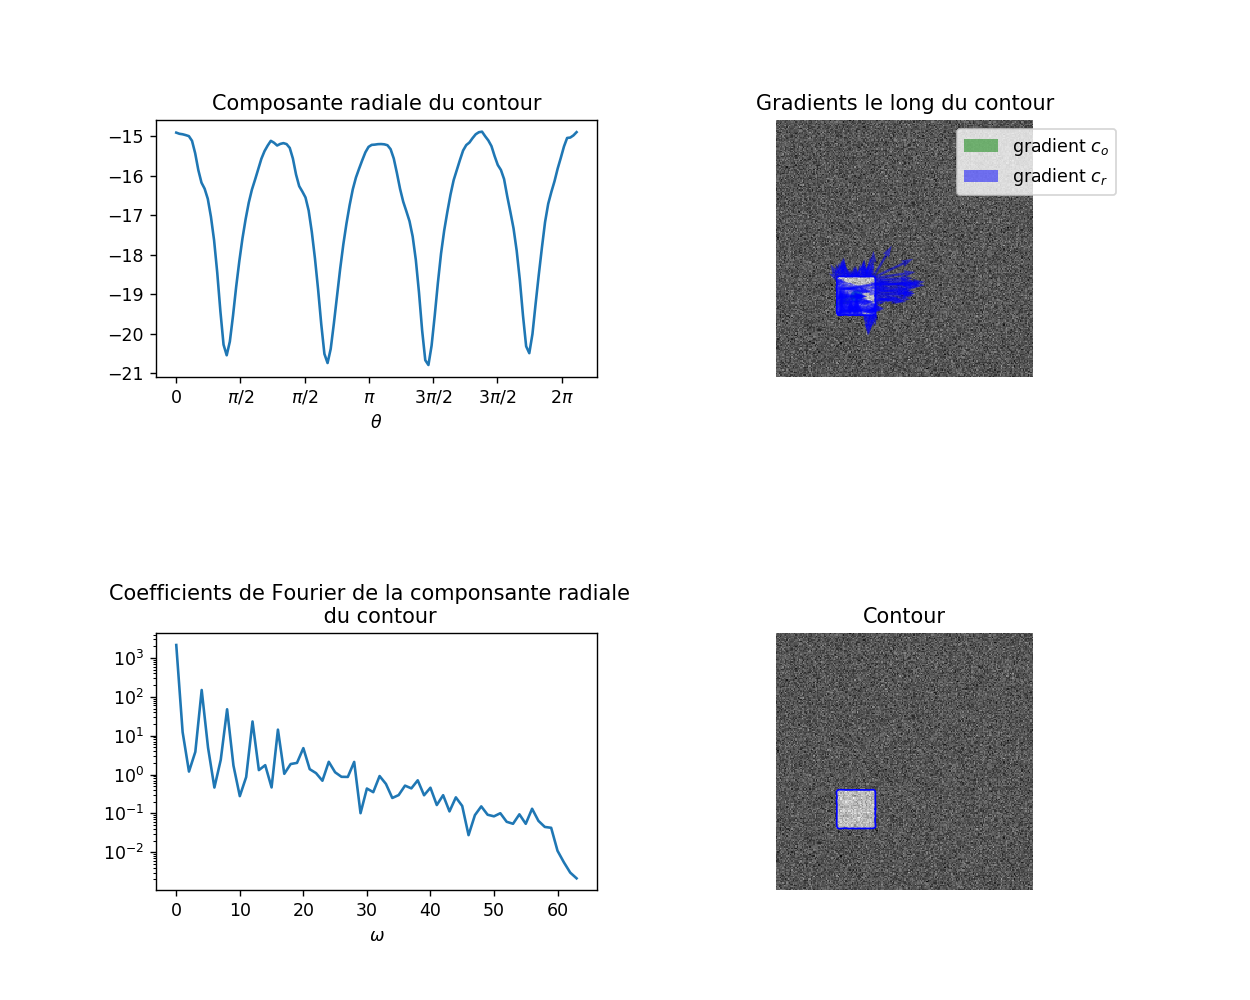

<IPython.core.display.Javascript object>


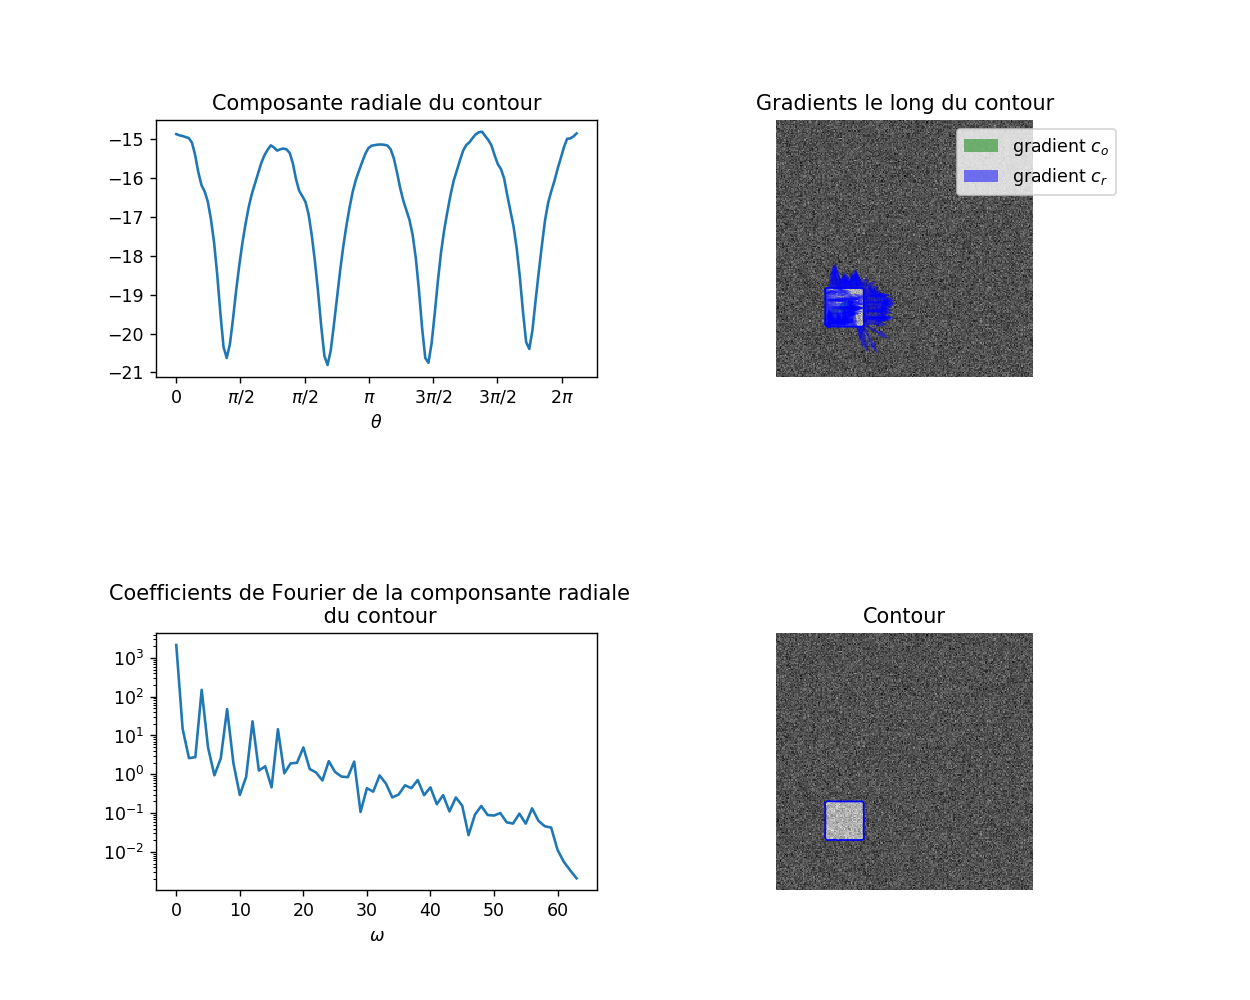

<IPython.core.display.Javascript object>


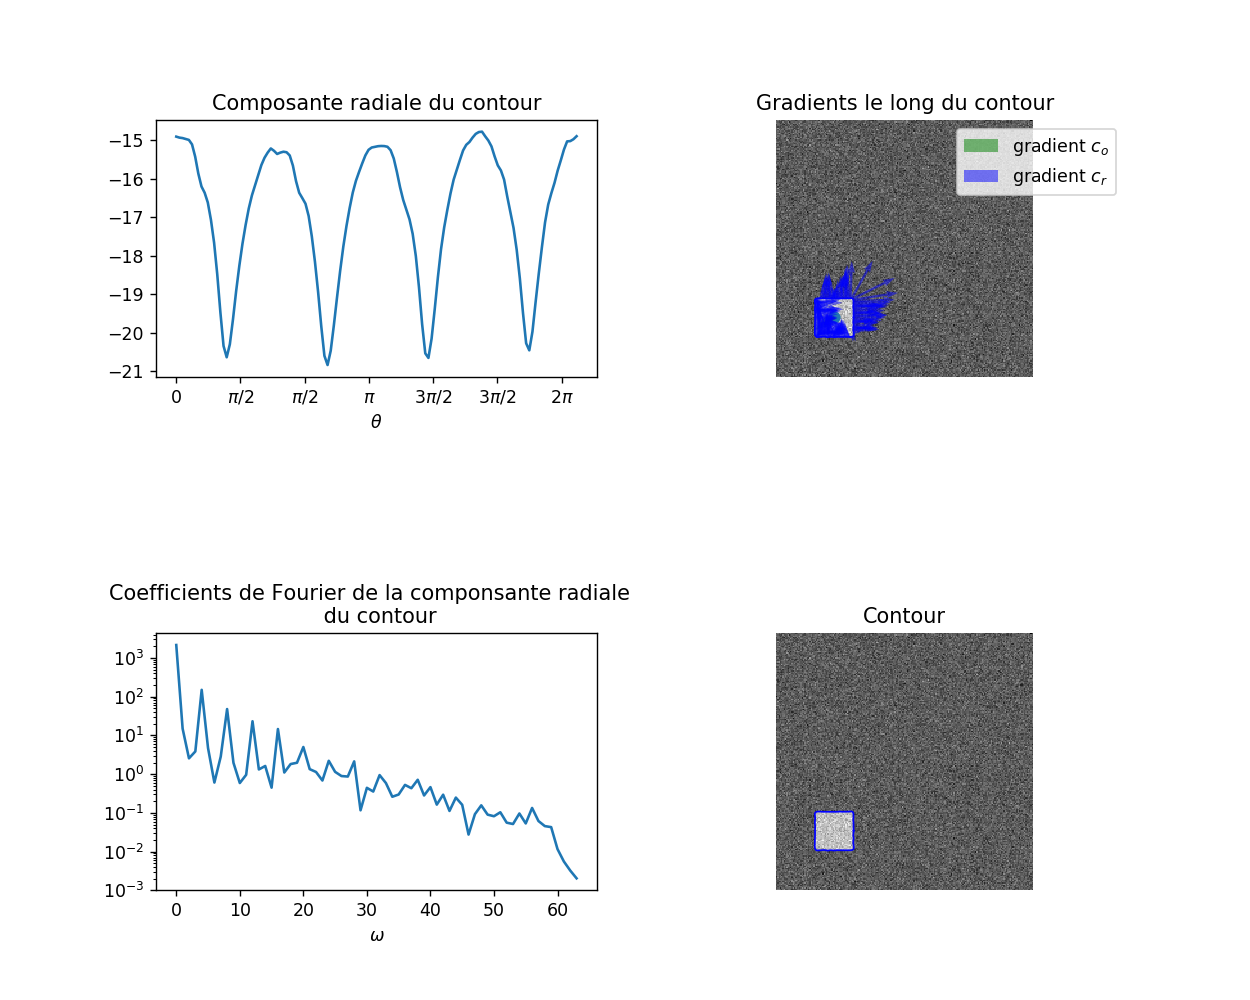

<IPython.core.display.Javascript object>


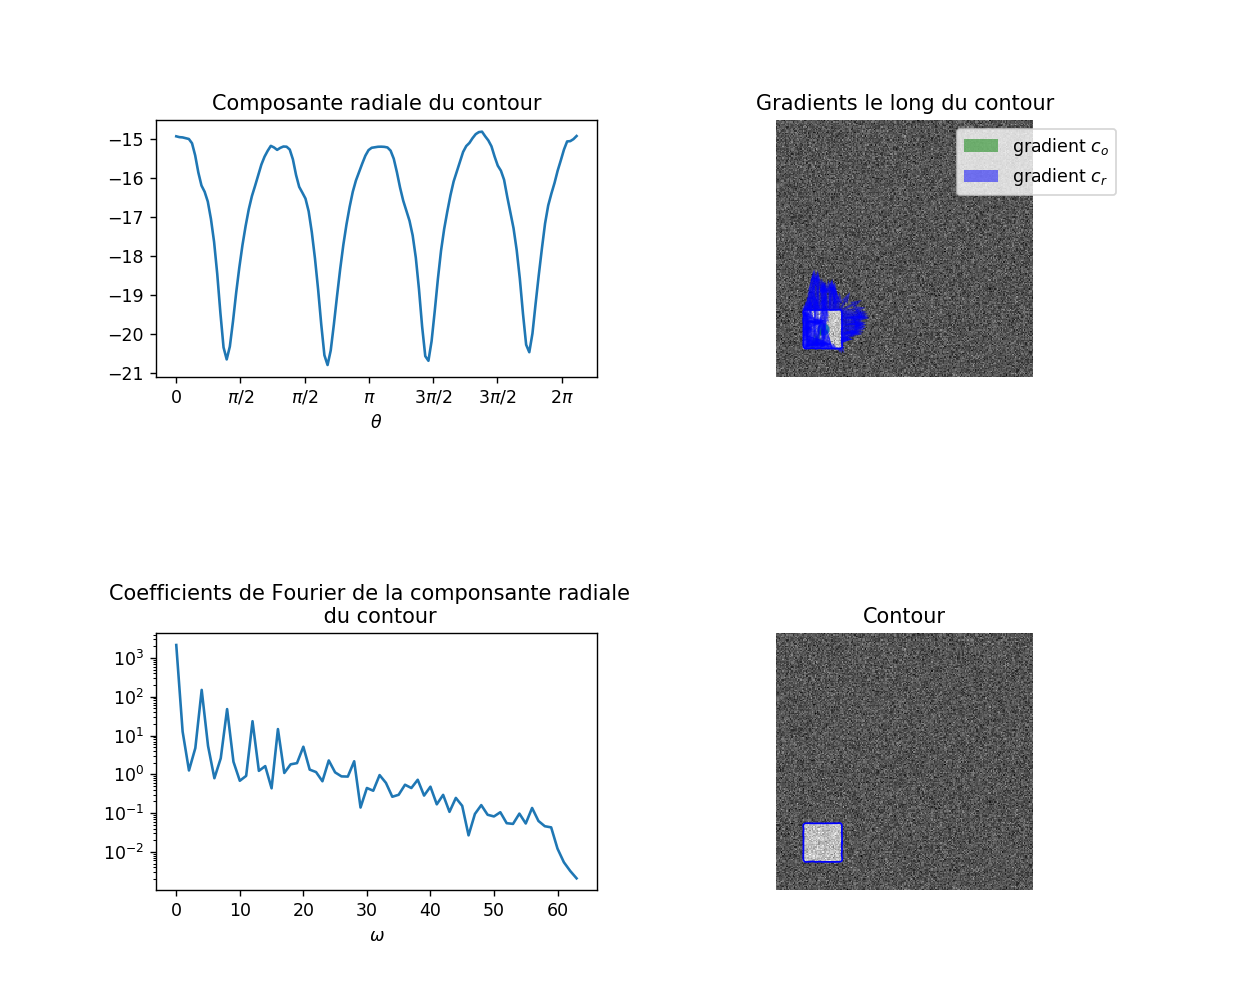

/home/leo-alberge/Documents/MVA/MethodesGeo/projet_github/MVA_GeodesicsMethods/venv/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


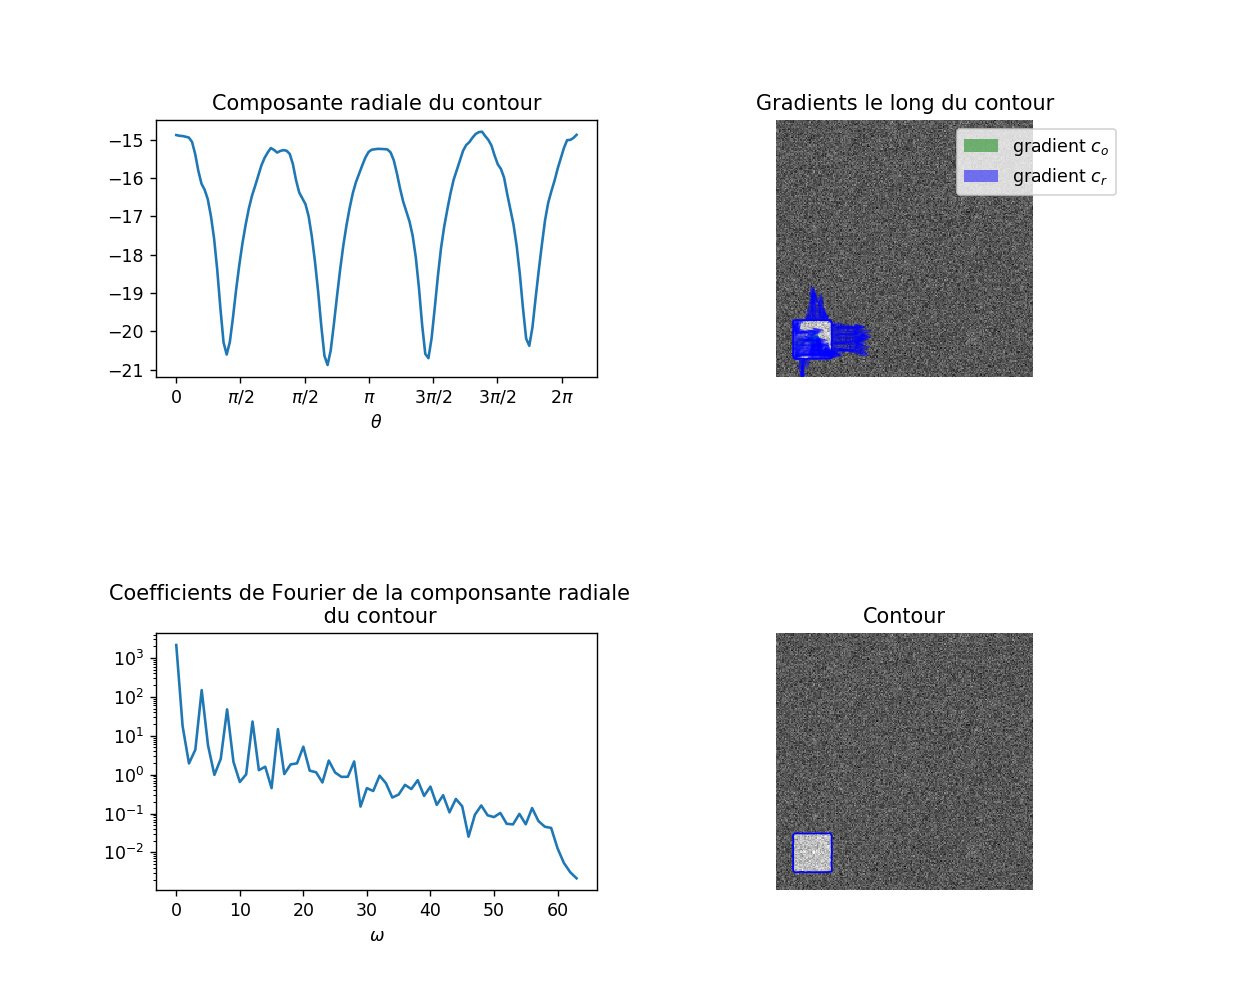

<IPython.core.display.Javascript object>


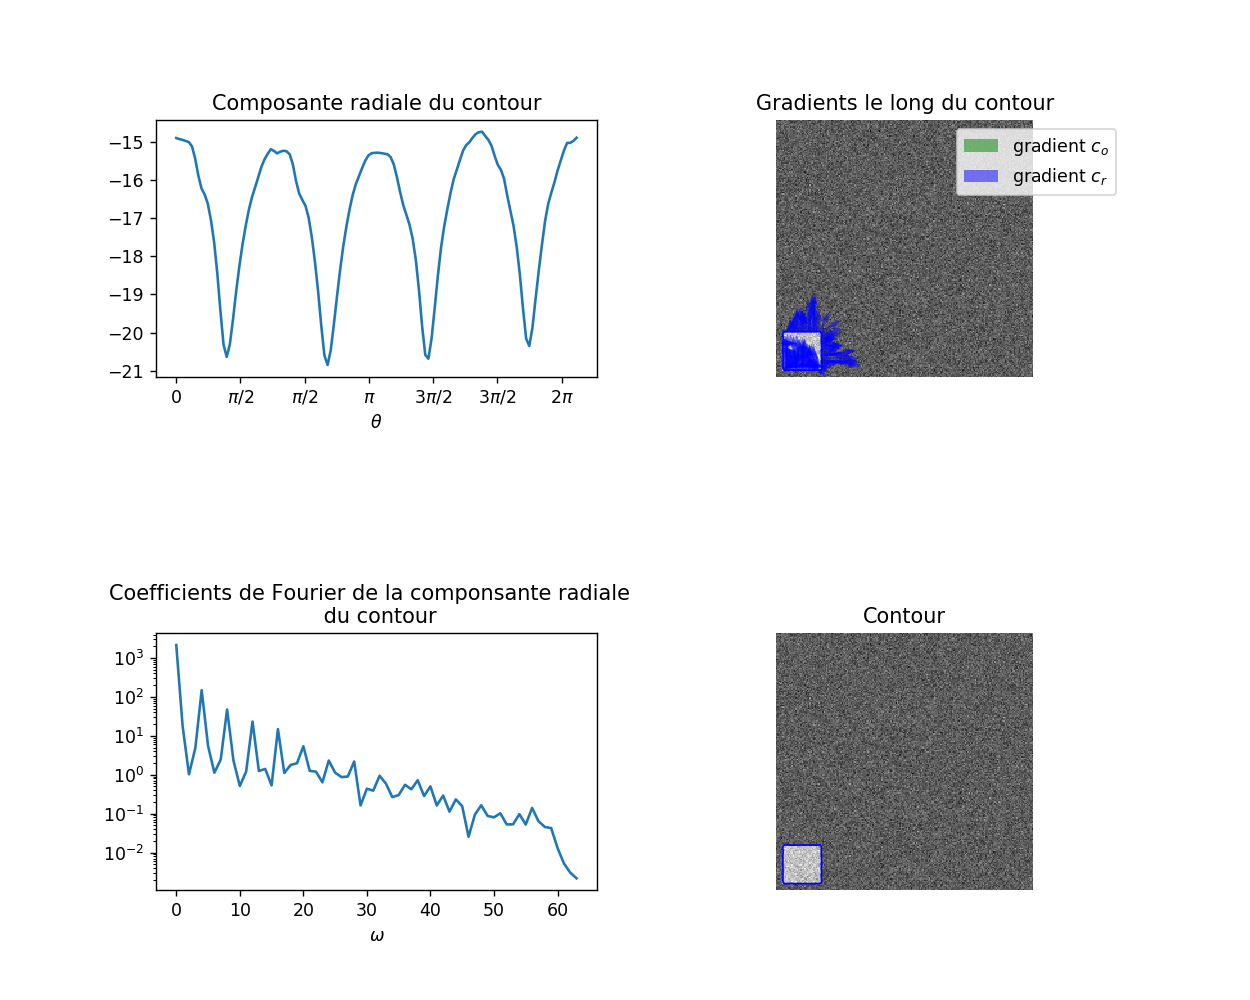

In [9]:
for t in range(20):
    c_0, c_r = perform_gradient_descent_polar_curve(Ws[t],
                                                    c_0,
                                                     c_r,
                                                     dt=1,
                                                     niter=1000,
                                                     nb_points_c=128,
                                                     sobolev=True,
                                                     lam=100,
                                                     gamma=0.042,
                                                     region_term=Ws[t],
                                                     c1=1,
                                                     c2=0,
                                                     step_display=100,
                                                     save='results/tracking'+str(t),
                                                     save_contour='results/tracking_contour' +str(t),

                                                     )
